In [1]:
import IPython

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from wurlitzer import sys_pipes
from plotnine import *
from mizani.formatters import percent_format
import mip
import itertools
import pandas as pd
import numpy as np

from UCP.input.parser import read_instance
import UCP.output as ucp_out
import UCP.model.ucp as modeller
import UCP.output.check_solution as ck
import UCP.output.charts as charts
from generic.optimization.solution_extraction import extract_solution

In [4]:
theme_set(theme_bw() + theme(figure_size=(10, 10 / 1.61)))

In [5]:
data = read_instance("./UCP/data/instance_5g.ucp")

In [6]:
data.thermal_plants[["plant", "l_cost", "c_cost", "min_power", "max_power", "min_on", "min_off"]]

,plant,l_cost,c_cost,min_power,max_power,min_on,min_off
0,0,4.19755,116.761,45.9688,127.349,1,1
1,1,6.79912,287.115,62.7142,185.865,2,3
2,2,7.05905,324.258,69.9785,160.913,2,3
3,3,7.52869,521.159,96.7459,236.831,6,6
4,4,7.02039,200.095,51.2834,151.001,2,3
5,5,7.07212,196.285,60.2507,183.386,2,3
6,6,4.44010,144.004,43.7572,104.979,1,1
7,7,4.92397,119.922,47.1735,113.187,1,1
8,8,4.61960,114.053,42.8216,112.959,1,1
9,9,6.78825,269.271,68.1361,155.159,2,3


In [7]:
print(data.c_EIE)

64.57787306082221


In [8]:
ucp = modeller.create_model(data,)

In [9]:
with sys_pipes():
    ucp.model.solve()
print(f"Cost: {ucp.model.objective.value()}")

Welcome to the CBC MILP Solver 
Version: 2.9.0 
Build Date: Feb 12 2015 

command line - /home/ataverna/pyenv/experiments3.8/lib/python3.8/site-packages/pulp/apis/../solverdir/cbc/linux/64/cbc /tmp/3135d08d853644a0ba7bd124f941d56b-pulp.mps ratio None allow None threads None presolve on strong None gomory on knapsack on probing on branch printingOptions all solution /tmp/3135d08d853644a0ba7bd124f941d56b-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 1909 COLUMNS
At line 8911 RHS
At line 10816 BOUNDS
At line 11537 ENDATA
Problem MODEL has 1904 rows, 1008 columns and 5033 elements
Coin0008I MODEL read with 0 errors
String of None is illegal for double parameter ratioGap value remains 0
String of None is illegal for double parameter allowableGap value remains 0
String of None is illegal for integer parameter threads value remains 0
String of None is illegal for integer parameter strongBranching value remains 5
Option for gomoryCuts changed from ifmove to

In [10]:
solution = extract_solution(ucp)

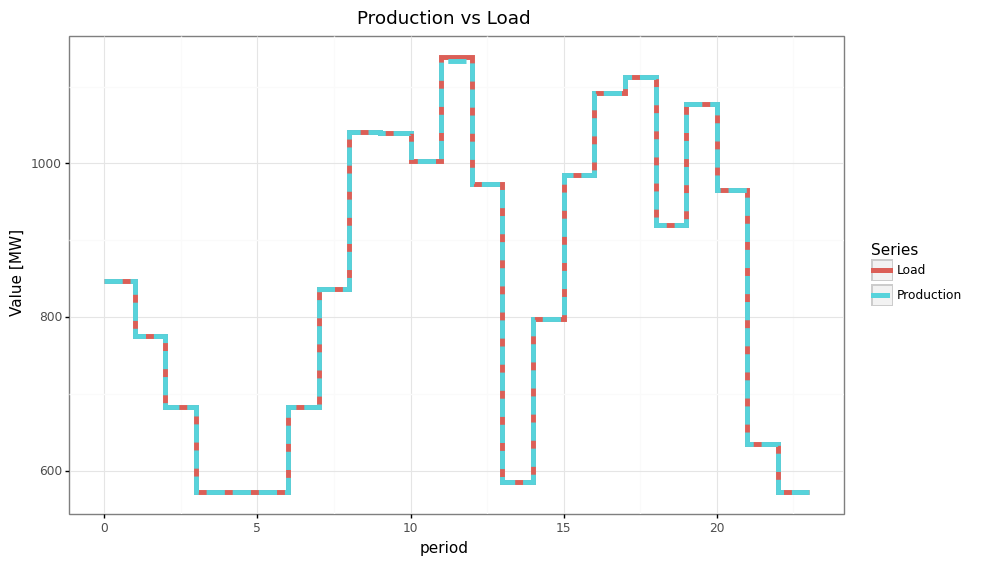

<ggplot: (8782998238031)>


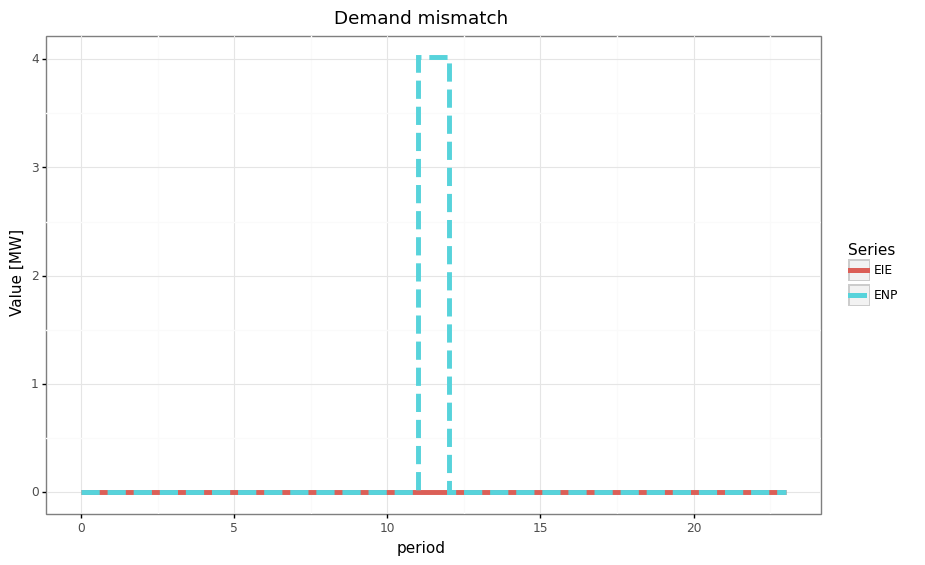

<ggplot: (8782998238067)>


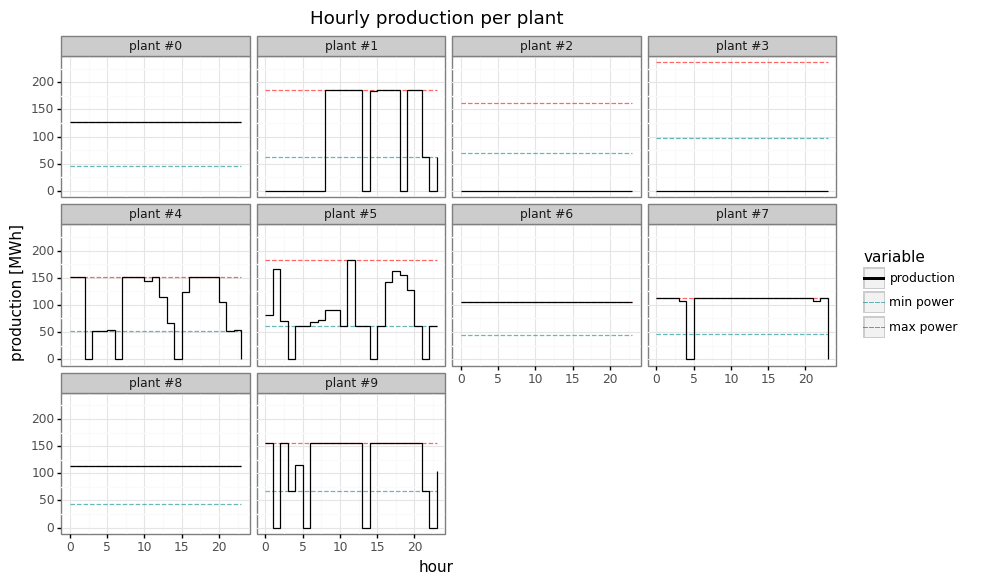

<ggplot: (8782998374443)>


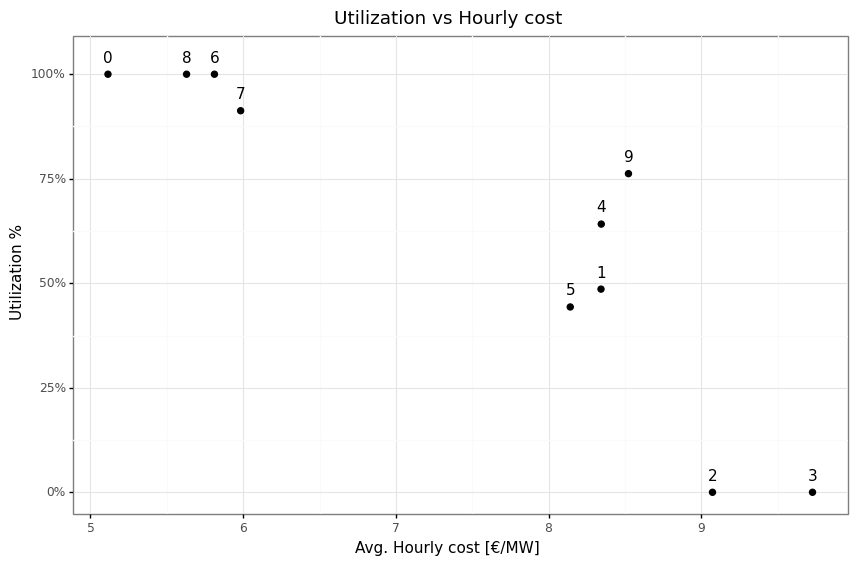

<ggplot: (8782998377003)>


In [11]:
plots = [charts.total_production(data, solution),
 charts.enp_vs_eie(data, solution),
 charts.production_by_plant(data, solution),
 charts.plant_utilization(data, solution)]

for p in plots:
    print(p)